In [2]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the MNIST dataset
MNIST = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = MNIST.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Normalizing the data
x_train, x_test = x_train/255.0 , x_test/255.0

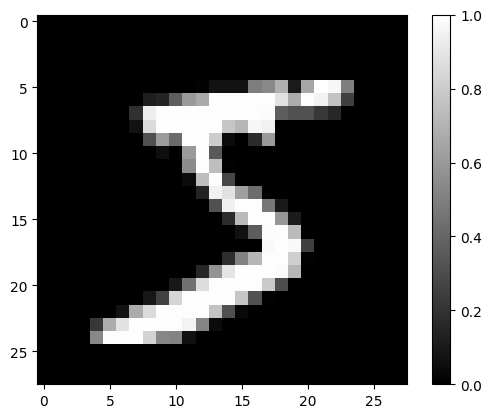

In [6]:
#Displaying a sample image
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [8]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # Input layer (flattening 28x28 to 1D)
    keras.layers.Dense(128, activation='relu'),   # Hidden layer (128 neurons)
    keras.layers.Dense(10, activation='softmax'), # Output layer (10 classes for 0-9)
   ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compiling the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8824 - loss: 0.4269
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9655 - loss: 0.1191
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.0552
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9884 - loss: 0.0401
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9904 - loss: 0.0330
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0259
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9943 - loss: 0.0202
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9955 - loss: 0.0159
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0133


In [11]:
#Evaluating the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0979
Test accuracy: 0.9773


In [12]:
#Making a prediction
prediction = model.predict(np.expand_dims(x_test[0], axis=0))
predicted_label = np.argmax(prediction)
print(f'Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted label: 7


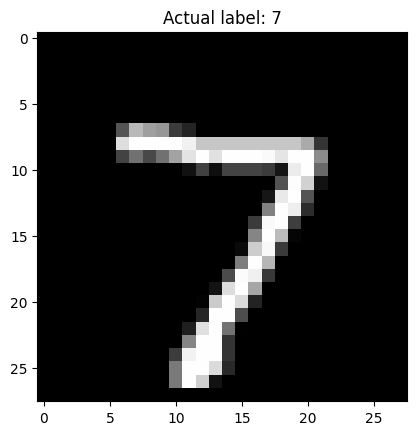

In [13]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Actual label: {y_test[0]}')
plt.show()